# Hyperparameters, `Parameter`, `ParameterSet`, and `ParameterSetCollection`

Along with the observational priors contained within `DiscreteLogPrior` we need priors on the hyperparameters dictating the shapes of the observational priors. 

`GammaBayes` treats these two distributions differently so that `DiscreteLogPrior` can be as optimised as possible seeing as it needs to be used to evaluate three dimensional integrals tens of millions of times for large observation runs.

Additionally, despite both being priors they just behave differently within `GammaBayes` and this tutorial will detail hte various behaviours of the `Parameter` class which houses these hyperparameter priors and the two collection classes for it.

## `Parameter`

`Parameter` has three general use cases:
1. A discrete distribution over a one-dimensional axis that is either linearly or log10 spaced
2. A continuous distribution defined between two bounds in either linear or log10 space
3. A custom distribution implemented using `scipy`

### `Parameter` as a discrete distribution

In [1]:
from gammabayes import Parameter


discrete_linear_parameter = Parameter(discrete=True, bounds=[10, 20], bins=11, scaling='linear')
discrete_linear_parameter

/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'discrete': True,
 'bins': 11,
 'scaling': 'linear',
 'default_value': 1.0,
 'num_events': 1,
 'axis': array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
 'parameter_type': 'None',
 'bounds': [10.0, 20.0],
 'custom_dist': False,
 'distribution': <scipy.stats._distn_infrastructure.rv_sample at 0x1954f4140>,
 'transform_scale': 11,
 'rvs_sampling': False}

In [2]:
discrete_log10_parameter = Parameter(discrete=True, bounds=[1e-5, 1e5], bins=11, scaling='log10')
discrete_log10_parameter

{'discrete': True,
 'bins': 11,
 'scaling': 'log10',
 'default_value': 1.0,
 'num_events': 1,
 'axis': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04, 1.e+05]),
 'parameter_type': 'None',
 'bounds': [1e-05, 100000.0],
 'custom_dist': False,
 'distribution': <scipy.stats._distn_infrastructure.rv_sample at 0x1987edcd0>,
 'transform_scale': 11,
 'rvs_sampling': False}

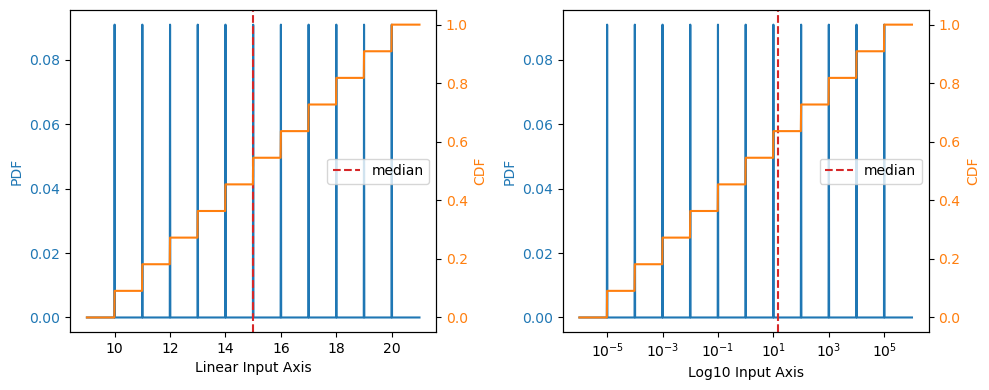

In [3]:
from matplotlib import pyplot as plt
import numpy as np

linear_input_axis = np.linspace(9, 21, 1201)
log10_input_axis = np.logspace(-6, 6, 1201)



# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot on the first axis
ax1 = ax[0]
ax1.plot(linear_input_axis, discrete_linear_parameter.pdf(linear_input_axis), c='tab:blue')
ax1.set_xlabel('Linear Input Axis')
ax1.set_ylabel('PDF', c='tab:blue',)
ax1.tick_params(axis='y', labelcolor='tab:blue',)


# Create a twin y-axis sharing the same x-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(linear_input_axis, discrete_linear_parameter.cdf(linear_input_axis), c='tab:orange')
ax1_twin.set_ylabel('CDF', c='tab:orange', )
ax1_twin.tick_params(axis='y', labelcolor='tab:orange', )


ax1.axvline(discrete_linear_parameter.median, ls='--', c='tab:red', label='median')

ax1.legend()

# Plot on the second axis
ax2 = ax[1]
ax2.plot(log10_input_axis, discrete_log10_parameter.pdf(log10_input_axis), c='tab:blue')
ax2.set_xlabel('Log10 Input Axis')
ax2.set_xscale('log')
ax2.set_ylabel('PDF', c='tab:blue',)
ax2.tick_params(axis='y', labelcolor='tab:blue',)

# Create a twin y-axis sharing the same x-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(log10_input_axis, discrete_log10_parameter.cdf(log10_input_axis), c='tab:orange')
ax2_twin.set_ylabel('CDF', c='tab:orange', )
ax2_twin.tick_params(axis='y', labelcolor='tab:orange', )


ax2.axvline(discrete_linear_parameter.median, ls='--', c='tab:red', label='median')
ax2.legend()


# Show the plot
plt.tight_layout()
plt.show()

### `Parameter` as a continuous distribution

In [4]:
continuous_linear_parameter = Parameter(discrete=False, bounds=[10, 20], scaling='linear')
continuous_linear_parameter

{'discrete': False,
 'bins': 11,
 'scaling': 'linear',
 'default_value': 1.0,
 'num_events': 1,
 'axis': None,
 'parameter_type': 'None',
 'bounds': [10.0, 20.0],
 'custom_dist': False,
 'distribution': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x198f06c90>,
 'rvs_sampling': True}

In [5]:
continuous_log10_parameter = Parameter(discrete=False, bounds=[1e-5, 1e5], scaling='log10')
continuous_log10_parameter

{'discrete': False,
 'bins': 11,
 'scaling': 'log10',
 'default_value': 1.0,
 'num_events': 1,
 'axis': None,
 'parameter_type': 'None',
 'bounds': [1e-05, 100000.0],
 'custom_dist': False,
 'distribution': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x198fa53d0>,
 'rvs_sampling': True}

In [6]:
continuous_log10_parameter.distribution.logpdf(1e-2)

1.4685526477460895

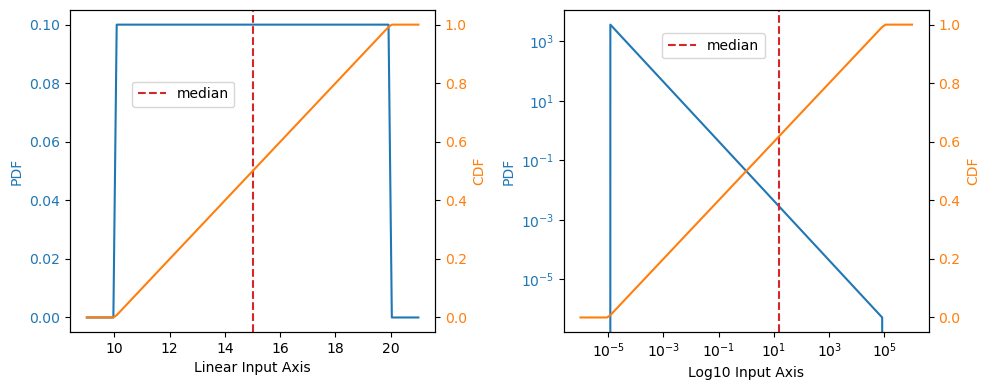

In [34]:
from matplotlib import pyplot as plt
import numpy as np

linear_input_axis = np.linspace(9, 21, 101)
log10_input_axis = np.logspace(-6, 6, 101)



# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot on the first axis
ax1 = ax[0]
ax1.plot(linear_input_axis, continuous_linear_parameter.pdf(linear_input_axis), c='tab:blue')
ax1.set_xlabel('Linear Input Axis')
ax1.set_ylabel('PDF', c='tab:blue',)
ax1.tick_params(axis='y', labelcolor='tab:blue',)


# Create a twin y-axis sharing the same x-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(linear_input_axis, continuous_linear_parameter.cdf(linear_input_axis), c='tab:orange')
ax1_twin.set_ylabel('CDF', c='tab:orange', )
ax1_twin.tick_params(axis='y', labelcolor='tab:orange', )


ax1.axvline(discrete_linear_parameter.median, ls='--', c='tab:red', label='median')
ax1.legend(loc=[0.17, 0.7])

# Plot on the second axis
ax2 = ax[1]
ax2.plot(log10_input_axis, continuous_log10_parameter.pdf(log10_input_axis), c='tab:blue')
ax2.set_xlabel('Log10 Input Axis')
ax2.set_xscale('log')
ax2.set_ylabel('PDF', c='tab:blue',)
ax2.tick_params(axis='y', labelcolor='tab:blue',)
ax2.set_yscale('log')

# Create a twin y-axis sharing the same x-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(log10_input_axis, continuous_log10_parameter.cdf(log10_input_axis), c='tab:orange')
ax2_twin.set_ylabel('CDF', c='tab:orange', )
ax2_twin.tick_params(axis='y', labelcolor='tab:orange', )


ax2.axvline(discrete_linear_parameter.median, ls='--', c='tab:red', label='median')
ax2.legend(loc=[0.27, 0.85])


# Show the plot
plt.tight_layout()
plt.show()

### `Parameter` with a custom distribution

In [73]:
continuous_custom_parameter = Parameter(discrete=False, custom_dist_name='norm', custom_dist_kwargs={'loc':0.5, 'scale':0.125})
continuous_custom_parameter

{'custom_dist_name': 'norm',
 'custom_dist_kwargs': {'loc': 0.5, 'scale': 0.125},
 'discrete': False,
 'bins': 11,
 'scaling': 'linear',
 'default_value': 1.0,
 'num_events': 1,
 'axis': None,
 'parameter_type': 'None',
 'bounds': [0.0, 1.0],
 'custom_dist': True,
 'distribution': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x19bb04920>,
 'rvs_sampling': False}

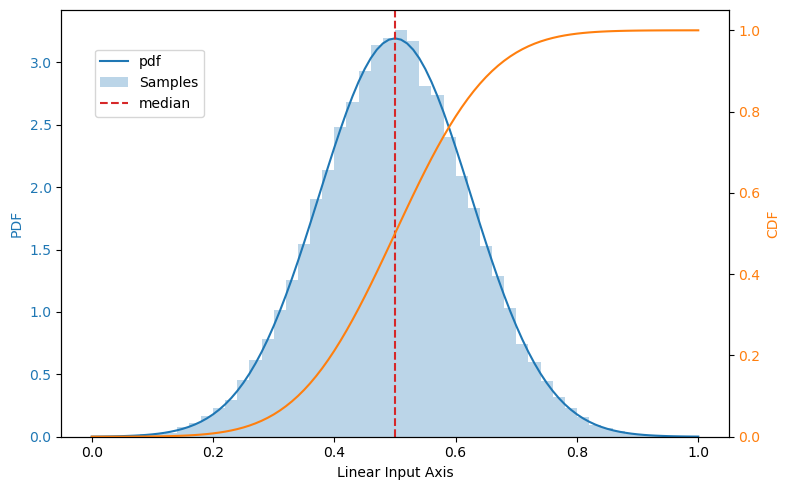

In [75]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import uniform

linear_input_axis = np.linspace(0, 1, 101)

uniform_samples = uniform().rvs(50000)

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Plot on the first axis
ax1 = ax
ax1.plot(linear_input_axis, continuous_custom_parameter.pdf(linear_input_axis), c='tab:blue', label='pdf')
ax1.set_xlabel('Linear Input Axis')
ax1.set_ylabel('PDF', c='tab:blue',)
ax1.tick_params(axis='y', labelcolor='tab:blue',)


ax1.hist([continuous_custom_parameter.unitcube_transform(sample) for sample in uniform_samples], 
         alpha=0.3, density=True, bins=linear_input_axis[::2], label='Samples')
ax1.axvline(continuous_custom_parameter.median, ls='--', c='tab:red', label='median')

# Create a twin y-axis sharing the same x-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(linear_input_axis, continuous_custom_parameter.cdf(linear_input_axis), c='tab:orange')
ax1_twin.set_ylabel('CDF', c='tab:orange', )
ax1_twin.tick_params(axis='y', labelcolor='tab:orange', )
ax1_twin.set_ylim([0, None])
ax1.legend(loc=[0.05, .75])
# Show the plot
plt.tight_layout()
plt.show()

___....Currently undergoing remodelling, sorry for the inconvenience....___